In [3]:
import pandas as pd
import numpy as np

from pydataset import data
import os

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

### In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [ ]:
df_iris = data('iris')
df_iris

In [ ]:
#print the first 3 rows

In [ ]:
df_iris.head(3)

In [ ]:
#print the number of rows and columns (shape)

In [ ]:
df_iris.shape

In [ ]:
#print the column names

In [ ]:
df_iris.columns

In [ ]:
#print the data type of each column

In [ ]:
df_iris.dtypes

In [ ]:
df_iris.info()

In [ ]:
#print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [ ]:
df_iris.describe().T

## Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [ ]:
#notes - I had to get this file and find where is was in my directory 

In [ ]:
df_excel = pd.read_excel('Excel_Exercises.xlsx', sheet_name= 'Table1_CustDetails')
df_excel

### assign the first 100 rows to a new dataframe, df_excel_sample

In [ ]:
df_excel_sample = df_excel.head(100)

### print the number of rows of your original dataframe

In [ ]:
df_excel.shape[0]

### print the first 5 column names

In [ ]:
df_excel.columns[:5]

### print the column names that have a data type of object

In [ ]:
df_excel.select_dtypes(include='object')

### compute the range for each of the numeric variables.

In [ ]:
stats_excel = df_excel.describe().T #the T is for tanspose and this will flip the chart i tried to find how to make the range but this worked 
stats_excel

In [ ]:
stats_excel['range'] = stats_excel['max'] - stats_excel['min']
stats_excel

## Read the data from this google sheet into a dataframe, df_google



In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/12dVjru-lRFq-vO5ALQVaWcCa-fbi0SpQxS9Y_JrMKOc/edit#gid=341089357'

In [ ]:
sheet_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
sheet_export_url

In [ ]:
df_google = pd.read_csv(sheet_export_url)
df_google

#### print the first 3 rows

In [ ]:
df_google.head(3)

### print the number of rows and columns

In [ ]:
df_google.shape

### print the column names

In [ ]:
df_google.columns.to_list()

### print the data type of each column

In [ ]:
df_google.dtypes

### print the summary statistics for each of the numeric variables

In [ ]:
df_google.describe().T

### print the unique values for each of your categorical variables

In [ ]:
df_google.Name.nunique()

In [ ]:
df_google.Sex.nunique()

In [ ]:
df_google.Ticket.nunique()

In [ ]:
df_google.Cabin.nunique()

In [ ]:
df_google.Embarked.nunique()

## Make a new python module, acquire.py to hold the following data aquisition functions:

### Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [ ]:
import env

In [ ]:
from env import host, user, password

In [ ]:
def get_connection(db, username=user, host=host, password=password):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

In [ ]:
def new_titanic_data():
    '''
    This function reads the titanic data from the Codeup db into a df.
    '''
    # Create SQL query.
    sql_query = 'SELECT * FROM passengers'
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('titanic_db'))
    
    return df

In [ ]:
def get_titanic_data():
    '''
    This function reads in titanic data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('titanic_df.csv'):
        
        # If csv file exists, read in data from csv file.
        df = pd.read_csv('titanic_df.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame.
        df = new_titanic_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('titanic_df.csv')
        
    return df

In [ ]:
titanic_df = get_titanic_data()

In [ ]:
titanic_df.head()

In [ ]:
titanic_df.shape

In [ ]:
def new_iris_data():
    '''
    This function reads the iris data from the Codeup db into a df.
    '''
    sql_query = """
                SELECT 
                    species_id,
                    species_name,
                    sepal_length,
                    sepal_width,
                    petal_length,
                    petal_width
                FROM measurements
                JOIN species USING(species_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    
    return df

In [ ]:
def get_iris_data():
    '''
    This function reads in iris data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('iris_df.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('iris_df.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame
        df = new_iris_data()
        
        # Cache data
        df.to_csv('iris_df.csv')
        
    return df

In [ ]:
iris_df = get_iris_data()
iris_df.head()

In [ ]:
def new_telco_data():
    '''
    This function reads the iris data from the Codeup db into a df.
    '''
    sql_query = """
                select * from customers
                join contract_types using (contract_type_id)
                join internet_service_types using (internet_service_type_id)
                join payment_types using (payment_type_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('telco_churn'))
    
    return df

In [ ]:
def get_telco_data():
    '''
    This function reads in iris data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('telco.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('telco.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame
        df = new_telco_data()
        
        # Cache data
        df.to_csv('telco.csv')
        
    return df

In [ ]:
get_telco_data()

# Data Preperation exercises 

 ## Using the Iris Data:

- Use the function defined in acquire.py to load the iris data.

In [ ]:
iris = acquire.get_iris_data()
iris

- Drop the species_id and measurement_id columns.

In [ ]:
iris.info()

In [ ]:
iris

In [ ]:
#there isnt any measurement_id for me 

iris.drop(columns=['species_id'], inplace=True)
iris.head()

- Rename the species_name column to just species.


In [ ]:

iris.rename(columns ={'species_name':'species'}, inplace=True)
iris.head()

- Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [ ]:
species_dummies = pd.get_dummies(iris[['species']],drop_first=[True], dummy_na=False)
species_dummies.head()

In [ ]:
iris = pd.concat([iris, species_dummies], axis=1)
iris.head()

- Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
def prep_iris(iris):
    iris.drop(columns="species_id", inplace= True)
    iris.rename(columns ={'species_name':'species'}, inplace=True)
    species_dummies = pd.get_dummies(iris[['species']],drop_first=[True],dummy_na=False)
    iris = pd.concat([iris, species_dummies], axis=1)
    return iris

In [ ]:
iris = acquire.get_iris_data()
iris = prep_iris(iris)
iris.head()

###  Using the Titanic dataset

- Use the function defined in acquire.py to load the Titanic data.

In [ ]:
titanic = acquire.get_titanic_data()
titanic

In [ ]:
titanic.info()

In [ ]:
titanic = titanic.drop(columns="deck")
titanic

- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:
dummy_titanic = pd.get_dummies(titanic[['sex', 'class']])
dummy_titanic

In [ ]:
dummy_titanic = pd.get_dummies(titanic[['sex', 'class']], dummy_na= False, drop_first=[True, True])
dummy_titanic

In [ ]:
titanic = pd.concat([titanic, dummy_titanic], axis=1)
titanic

- Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [ ]:
def prep_data(titanic):
    titanic = acquire.get_titanic_data()
    titanic = titanic.drop(columns="deck")
    dummy_titanic = pd.get_dummies(titanic[['sex', 'class']], dummy_na= False, drop_first=[True, True])
    titanic = pd.concat([titanic, dummy_titanic], axis=1)
    return titanic

In [ ]:
prep_titanic = clean_data(titanic)
prep_titanic

In [ ]:
prep_titanic.info()

## Using the Telco dataset

- Use the function defined in acquire.py to load the Telco data.

In [ ]:
df = acquire.get_telco_data()

In [ ]:
df

In [ ]:
telco.info()

In [ ]:
df = telco.copy()

- Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [ ]:
# cols_to_drop = ['payment_type_id', 'internet_service_type_id', 'contract_type_id']
# telco = telco.drop(columns=cols_to_drop)
# telco.shape

In [ ]:
# telco.head()

#this is one way to drop collumns 

In [ ]:
#this is the way I will do it 
df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)

In [ ]:
df['total_charges'].value_counts()

In [ ]:
df[df.total_charges == ' ']

In [ ]:
df[df.tenure == 0]

It looks like customers with zero tenure have no total charges, and this is being represented by the whitespace character. Dropping these observations for now.

In [ ]:
df['total_charges'] = df['total_charges'].str.strip()


In [ ]:
df = df[df.total_charges != '']

In [ ]:
df[df.tenure == 0]

In [ ]:
# Convert datatype
df['total_charges'] = df.total_charges.astype(float)

In [ ]:
df.describe()

- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:
# encode binary categorical variables into numeric values
df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})

In [ ]:
dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)
dummy_df

In [ ]:
df = pd.concat([df, dummy_df], axis=1)
df.head()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire

# Remove limits on viewing dataframes
pd.set_option('display.max_columns', None)

In [ ]:
# encode number_relationships by utilizing information from dependents_encoded and partner_encoded
df['number_relationships'] = df['dependents_encoded'] + df['partner_encoded']

# create some new columns
df['online_backup_bool'] = df.online_backup.map({'Yes': 1, 'No': 0, 'No internet service': 0}) 
df['online_security_bool'] = df.online_security.map({'Yes': 1, 'No': 0, 'No internet service': 0})


# encode number_online_services by utilizing information from online_security_encoded and online_backup_encoded
df['number_online_services'] = df['online_security_bool'] + df['online_backup_bool']

# encode tenure in years (rounded down) by utilizing information from tenure (currently stored in months)
df['yearly_tenure'] = df.tenure.apply(lambda x: math.floor(x/12))

# encode has_internet
df['has_internet'] = df.internet_service_type.apply(lambda x: 0 if x == 'None' else 1)

In [ ]:
#then we can split the data 

In [ ]:
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.churn)

train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn)

In [ ]:
train.shape

In [ ]:
validate.shape

In [ ]:
test.shape


In [ ]:
def split_telco_data(df):
    '''
    This function performs split on telco data, stratify churn.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.churn)
    train, validate = train_test_split(train_validate, test_size=.2, 
                                   random_state=123, 
                                   stratify=train_validate.churn)
    return train, validate, test

- Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [ ]:
def prep_telco_data(df):
    # Drop duplicate columns
    df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)
       
    # Drop null values stored as whitespace    
    df['total_charges'] = df['total_charges'].str.strip()
    df = df[df.total_charges != '']
    
    # Convert to correct datatype
    df['total_charges'] = df.total_charges.astype(float)
    
    # Convert binary categorical variables to numeric
    df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
    df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
    df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
    df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
    df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
    df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})
    
    # Get dummies for non-binary categorical variables
    dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)
    
    # Concatenate dummy dataframe to original 
    df = pd.concat([df, dummy_df], axis=1)
    
    # split the data
    train, validate, test = split_telco_data(df)
    
    return train, validate, test

In [ ]:
train, validate, test

# Exploraoty Analysis Excersizes 

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from prepare import train_validate_test_split
np.random.seed(123)


Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:
        

## Acquire, prepare & split your data.

In [4]:
iris = acquire.get_iris_data()
iris.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [5]:
iris = iris.drop(columns='species_id')
iris.head(2)

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2


In [ ]:
import env

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_iris():
    my_query="SELECT * FROM iris_db.measurements"
    df = pd.read_sql(my_query, get_connection('iris_db'))
    return df

In [ ]:
df = get_iris()
df

split your data.

In [6]:
def train_validate_test_split(iris, target, seed=123):
   
    train_validate, test = train_test_split(iris, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=iris[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test


In [7]:

train, validate, test = train_validate_test_split(iris, target='species_name')
train.shape, validate.shape, test.shape


((84, 5), (36, 5), (30, 5))

In [ ]:
train.head(2)


In [ ]:
validate.head()

In [ ]:
test.head()

## 2 Univariate Stats


For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions.

In [ ]:
train.describe()

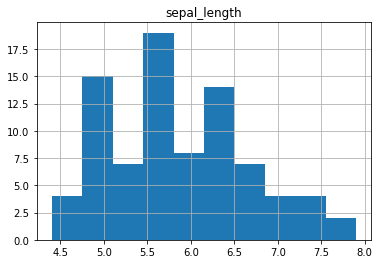

In [8]:
plt.title("sepal_length")
train.sepal_length.hist()
plt.show()


<AxesSubplot:title={'center':'sepal_length'}, xlabel='sepal_length'>

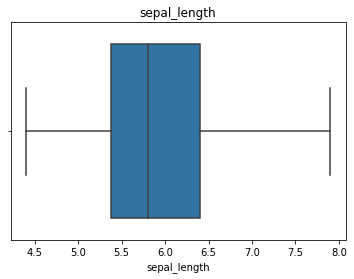

In [11]:
plt.title("sepal_length")
sns.boxplot(x='sepal_length',data=train)

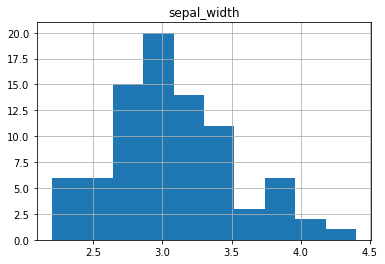

In [12]:
plt.title("sepal_width")
train.sepal_width.hist()
plt.show()


In [ ]:
plt.title("sepal_width")
sns.boxplot(x='sepal_width',data=train)

In [ ]:
plt.title("petal_length")
train.petal_length.hist()
plt.show()


In [ ]:
plt.title("petal_length")
sns.boxplot(x='petal_length',data=train)

In [ ]:
plt.title("petal_width")
train.petal_width.hist()
plt.show()

In [ ]:
plt.title("petal_width")
sns.boxplot(x='petal_width',data=train)

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [9]:
train.species_name.value_counts()

versicolor    28
setosa        28
virginica     28
Name: species_name, dtype: int64

(array([28.,  0.,  0.,  0.,  0., 28.,  0.,  0.,  0., 28.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

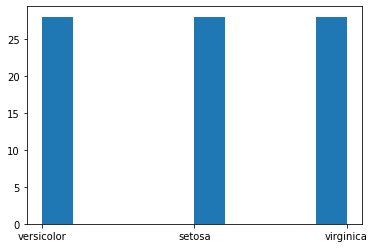

In [10]:
plt.hist(train.species_name)

 ## Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).



In [ ]:
train.describe()

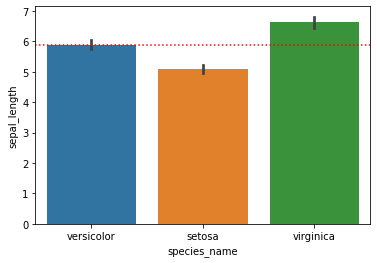

In [13]:
sns.barplot(x="species_name", y="sepal_length", data=train)
mean_sepal_length = train.sepal_length.mean()
plt.axhline(mean_sepal_length, color='red', linestyle='dotted')


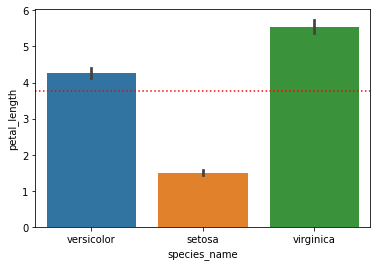

In [14]:
sns.barplot(x="species_name", y="petal_length", data=train)
mean_sepal_width = train.petal_length.mean()
plt.axhline(mean_sepal_width, color='red', linestyle='dotted')


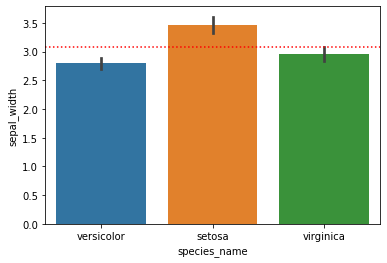

In [15]:
sns.barplot(x="species_name", y="sepal_width", data=train)
mean_sepal_width = train.sepal_width.mean()
plt.axhline(mean_sepal_width, color='red', linestyle='dotted')

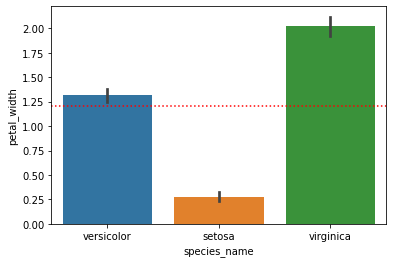

In [16]:
sns.barplot(x="species_name", y="petal_width", data=train)
mean_petal_width = train.petal_width.mean()
plt.axhline(mean_petal_width, color='red', linestyle='dotted')

In [17]:
pd.DataFrame(train[train.species_name == 'versicolor']).sepal_length.describe()

count    28.000000
mean      5.896429
std       0.425556
min       4.900000
25%       5.600000
50%       5.800000
75%       6.125000
max       6.900000
Name: sepal_length, dtype: float64

In [18]:
pd.DataFrame(train[train.species_name == 'setosa']).sepal_length.describe()

count    28.000000
mean      5.089286
std       0.360390
min       4.400000
25%       4.875000
50%       5.000000
75%       5.400000
max       5.800000
Name: sepal_length, dtype: float64

In [19]:
pd.DataFrame(train[train.species_name == 'virginica']).sepal_length.describe()

count    28.000000
mean      6.625000
std       0.532378
min       5.800000
25%       6.300000
50%       6.450000
75%       6.900000
max       7.900000
Name: sepal_length, dtype: float64

In [21]:
virginica = train[train.species_name == 'virginica']
versicolor = train[train.species_name == 'versicolor']
setosa = train[train.species_name == 'setosa']

t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative="greater")
t, p


(767.0, 3.235595834904965e-10)

In [22]:
test_var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in test_var:
    t, p = t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="greater")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p)
    print('------------------')
    print('\n')

Comparing sepal_length between virginica and versicolor
676.5 1.541014598267054e-06
------------------


Comparing sepal_width between virginica and versicolor
510.0 0.02628629569922847
------------------


Comparing petal_length between virginica and versicolor
776.5 1.4739917857575313e-10
------------------


Comparing petal_width between virginica and versicolor
767.0 3.235595834904965e-10
------------------




## Question Three: Telco

In [23]:
raw_data = acquire.get_telco_data()
raw_data.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [26]:
telco = prepare.prep_telco_data(raw_data)
telco

KeyError: "['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'] not found in axis"